
# Exploratory Data Analysis Notebook

This notebook is going to be comprised of several different sections:

1. Reading and cleaning the data from CSV file
2. Dataframe seperation stuff age height weight
3. Understanding our research group (n=126) population visually, representing their demographics in terms of gender, age, preferred climbing discipline and something else??
4. Something else
5. Something else lol


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Introduction Section

For our data analysis, I wanted to start by trying to understand our research group by representing some basic demographics
To represent this, a series of charts were created, visualizing information such as gender, age, and preferred climbing disciplines.



In [3]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
#take seperate entries for male and female


## Pieplot for Gender



<AxesSubplot:ylabel='Gender'>

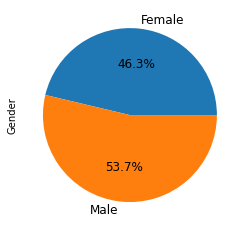

In [4]:
#pandas
gender_df = dataframe['SEX'].dropna().to_frame()
gender_pie = gender_df.groupby(by='SEX').size()
# print(gender_pie)
gender_pie.plot.pie(autopct="%.1f%%", fontsize=12, label="Gender")
# dataframe.value_counts('SEX').plot.pie()


Text(0.5, 1.0, 'Gender')

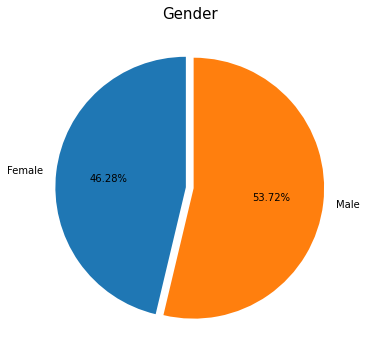

In [5]:
#matplotlib
pie, ax = plt.subplots(figsize=[10, 6])
gen_labels = gender_pie.keys()
plt.pie(x=gender_pie, autopct="%.2f%%", explode=[0.03]*2, labels=gen_labels, pctdistance=0.6, startangle = 90 )
plt.title("Gender", fontsize=15)
# pie.savefig("Gender.png")


## Pieplot for Ages
Set bins for ages

In [ ]:
# #gender pie chart
# fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10 , 10))
# gender_explode = (0.03,0.03)

# gender_df = dataframe['SEX'].dropna().to_frame()
# gender_pie = gender_df.groupby(by='SEX').size()

# gender_pie.plot.pie(autopct="%.1f%%", fontsize=11, label="Gender", ax=ax1, explode=gender_explode, startangle = 220)


# #age pie chart
# #will switch to bar eventually as this looks like shit
# age_bins = [17, 24, 31, 38, 60]
# age_bins_labels = ['17 to 24', '24 to 31', '31 to 38', '38 to 60']
# age_explode = (0.05, 0.05, 0.05, 0.05)

# age_df = dataframe['AGE (YRS)'].dropna().to_frame()
# age_pie = pd.cut(age_df['AGE (YRS)'], bins=age_bins).to_frame()

# age_pie.value_counts().plot(kind='pie', autopct="%.1f%%", fontsize=11,
#                             label="AGE", labels=age_bins_labels, startangle=50,
#                             explode=age_explode, shadow=True, ax=ax2)


In [ ]:
## Version with melt that .... could have been done without.
# age_bins_labels = ['17 to 24', '24 to 31', '31 to 38', '38 to 60']

# age_df = dataframe[['AGE (YRS)','#']].dropna()
# age_melty = pd.melt(age_df[['AGE (YRS)','#']],id_vars="#")
# age_bin = (pd.cut(age_melty['value'],bins=4, labels = age_bins_labels).value_counts().sort_index(ascending=False)).to_frame()
# print(age_bin)

# # print(age_melty)
# age_bin.plot(kind='barh')

(Text(0.5, 0, 'Age Groups'), Text(0, 0.5, 'Age Groups'))

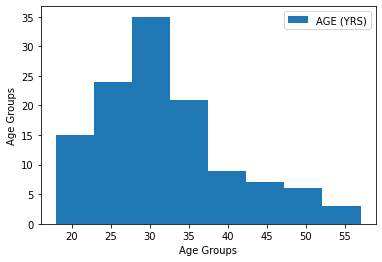

In [6]:
age_df = dataframe['AGE (YRS)'].dropna().to_frame()
# age_bins = ['18-23','23-28','29-33','33-38','39-43','44-48','49-53','54+']

age_hist = age_df.plot(kind='hist',bins=8,range=[18,57])
age_hist.set_xlabel('Age Groups'), age_hist.set_ylabel('Age Groups')

# age_group = age_data.groupby(by='AGE (YRS)').size()
# print(age_group)

#bin ages into buckets 6?
#,20-29,30-39,40-49,50-57
#cut


Trying to use pandas to divide data into percentiles
I think I'm trying to divide the bins into brackets? Of like 6? Maybe? 

<AxesSubplot:ylabel='Gender'>

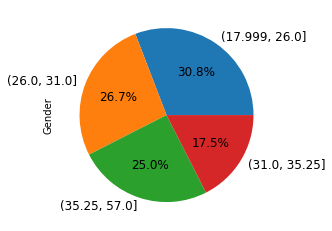

In [7]:
age_df['quartile'] = pd.qcut(age_df['AGE (YRS)'], q=4)
age_df['quartile'].value_counts().plot(kind='pie',autopct="%.1f%%", fontsize=12, label="Gender")


In [8]:
age_pie = pd.qcut(age_df['AGE (YRS)'], q=4).to_frame()
age_pie.head()
age_pie.value_counts()
print(type(age_pie))

<class 'pandas.core.frame.DataFrame'>


In [9]:
# pie2, ax2 = plt.subplots(figsize=[10,6])
# age_labels = age_pie.keys()
# plt.pie(x=age_pie, autopct='%.1f%%', labels = age_labels, pctdistance = 0.6)

In [10]:
#weird chart that doesnt work

# sns.set_theme(style="darkgrid")

# g = sns.jointplot(x="YRS CLIMBING", y="PEAK FORCE (KG)", data=dataframe,
#                   kind="reg", truncate=False,
#                   xlim=(0, 40), ylim=(30, 80),
#                   color="m", height=7)


## Height(CM) vs Weight(KG) 

<AxesSubplot:xlabel='HEIGHT (CM)', ylabel='BODY MASS (KG)'>

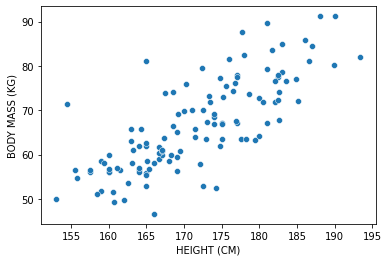

In [11]:
#Create a seperate dataframe and store both height and weight values
hweight_df = dataframe[['HEIGHT (CM)','BODY MASS (KG)']].dropna()

#Create Seaborn Scatterplot
sns.scatterplot(data=hweight_df, x="HEIGHT (CM)", y="BODY MASS (KG)")

In [ ]:
#Pairgrid

sns.pairplot(dataframe, kind='scatter', 
x_vars= "HEIGHT (CM)",
y_vars= "BODY MASS (KG)",
dropna=False)

## Climbing Disciplines

### Bouldering 72, Sport 80 , Both 31

In [12]:
#make a dataframe and drop all values that are NaN for both, cleaning the chart

# ind_disciplines_df= dataframe[['#','SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna(how='all')

# .count().to_frame()
# ind_disciplines_df['BOTH DISC'] = dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna().count().to_frame()



# print(ind_disciplines_df)
#do discipline for individual discipline, drop na value, drop values that double dip
#.count counts for value in column
# ind_disciplines_df.count()
# ind_disciplines_df = dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna(how='all')


In [13]:
disciplines_df= dataframe[['#','SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']]
disciplines_bar = pd.melt(disciplines_df,id_vars="#").dropna()
disciplines_bar = disciplines_bar.groupby(by='variable',as_index=False).size()
ax3 = sns.barplot(data=ind_disciplines_bar, x="variable", y="size")
ax3.set(ylim=(0,120))
#mess with axis
#figsize

print(disciplines_bar)






NameError: name 'ind_disciplines_bar' is not defined

### Both Disciplines

[(0.0, 120.0)]

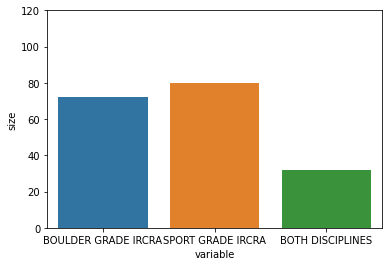

In [16]:
#Create a dataframe disciplines, so I can more easily work with pandas through that data ((Yes I know Enrico))
#Melt the data. Melt leaves some of the identifies and creates columns variable and value which we need to plot this chart.

disciplines_df= dataframe[['#','SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']]
disciplines_bar = pd.melt(disciplines_df,id_vars="#").dropna()
disciplines_bar = disciplines_bar.groupby(by='variable',as_index=False).size()


### Specifically placed the values here so that they would bypass the groupby and drop.

both_df = pd.DataFrame({"variable":['BOTH DISCIPLINES'], "size":[32]})
both = disciplines_bar.append(both_df, ignore_index=True)


ax3 = sns.barplot(data=both, x="variable", y="size")
ax3.set(ylim=(0,120))

# ax3 = sns.barplot(data=disciplines_bar, x="variable", y="size")
# ax3.set(ylim=(0,120))

In [ ]:
print(disciplines_df)
ind_disciplines_bar = pd.melt(disciplines_df,id_vars="#").dropna().count()
# ind_disciplines_bar = ind_disciplines_bar.groupby(by='variable').size()
# ax3 = sns.barplot(data=ind_disciplines_bar, x="variable", y="size")
ax3.set(ylim=(0,120))

In [107]:
# #do discipline for both disciplines, drop na, count value merge together same values?

# both_disciplines_df = dataframe['SPORT GRADE IRCRA'].merge(dataframe['BOULDER GRADE IRCRA'])
both_disciplines_df = dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna().count().to_frame()
# both_disciplines_df['BOTH DISC'] = both_disciplines_df['SPORT GRADE IRCRA'].append()

# both_disciplines_df.loc['BOULDER GRADE IRCRA'].append()


print(both_disciplines_df)
# dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna(how='all')

#Compare to dataframe index with na values dropped? 


                      0
SPORT GRADE IRCRA    31
BOULDER GRADE IRCRA  31


Trying to work this with groupby

In [ ]:
# ind_disciplines_df = dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna(how='all').count().to_frame()
# ind_disciplines_df['BOTH DISC'] = dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna().count().to_frame()

# sns.scatterplot(data=ind_disciplines_df, x= 'SPORT GRADE IRCRA')

dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
columns = ('SPORT GRADE IRCRA','BOULDER GRADE IRCRA')
dataframe